In [ ]:
# Analysis of E. Coli predictor markers
* Predictor alignment on  genomes

In [1]:
# Essential Libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data set
df = pd.read_csv('gene_presence_report.csv', index_col=0)

1436893830000|3159571    43502
1436893909000|3159808    40726
2873786891000|3159389    43590
2873787160000|3160196    43236
4310679577000|3158082    39793
4310679772000|3158667    43237
4310679831000|3158844    43233
4310680254000|3160113    43070
4310680315000|3160296    43430
4310680399000|3160548    42302
dtype: int64


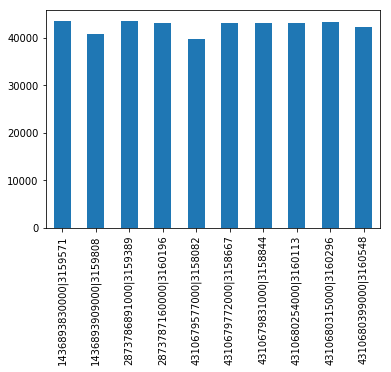

In [3]:
# Num of hits per predictor marker
per_marker_df = df.sum(axis=0)
print(per_marker_df)
plt.figure()
per_marker_df.plot(kind='bar')
plt.show()

In [4]:
# Summary of total hits per genome
total_hit_s = df.sum(axis=1)
total_hit_s.describe()

count    52677.000000
mean         8.089280
std          3.627041
min          0.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
dtype: float64

0      8054
1       365
2       134
3       187
4       212
5       143
6       249
7       603
8      1158
9      7337
10    34235
dtype: int64


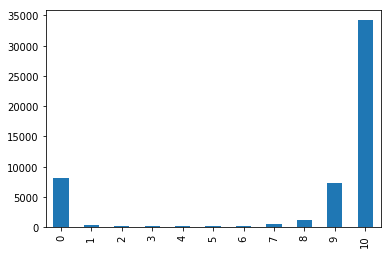

In [5]:
# Summary of genome count per number of hits
val_count_s = total_hit_s.value_counts().sort_index()
print(val_count_s)
val_count_s.plot(kind='bar')
plt.show()

In [6]:
# List genomes that do not meet threshold (3)
bad_genomes_s = total_hit_s[total_hit_s.isin(range(3))].index
print(bad_genomes_s)
bad_genomes = list(bad_genomes_s)
# uncomment next line to get full list
# print(list(bad_genomes_df))

Index(['ESC_HA1294AA_AS', 'ESC_BA0717AA_AS', 'ESC_HA0726AA_AS',
       'ESC_BA3685AA_AS', 'ESC_HA2648AA_AS', 'ESC_CA2653AA_AS',
       'ESC_BA6717AA_AS', 'ESC_AA9589AA_AS', 'ESC_LA1756AA_AS',
       'ESC_IA1056AA_AS',
       ...
       'ESC_LA5574AA_AS', 'ESC_PA1457AA_AS', 'ESC_OA1879AA_AS',
       'ESC_MA2986AA_AS', 'ESC_LA4695AA_AS', 'ESC_HA6471AA_AS',
       'ESC_BA0148AA_AS', 'ESC_CA3999AA_AS', 'ESC_GA8467AA_AS',
       'ESC_CA3125AA_AS'],
      dtype='object', name='genome_name', length=8553)


In [7]:
# Choose 10 at random
'''
import random
samples = random.sample(bad_genomes, 10)
'''
samples = [
    'ESC_BA9048AA_AS', 'ESC_BA4307AA_AS', 'ESC_KA3487AA_AS',
    'ESC_GA7863AA_AS', 'ESC_CA5285AA_AS', 'ESC_CA4089AA_AS',
    'ESC_BA7159AA_AS', 'ESC_CA2883AA_AS', 'ESC_AA8910AA_AS',
    'ESC_JA5955AA_AS'
]
print(samples)

['ESC_BA9048AA_AS', 'ESC_BA4307AA_AS', 'ESC_KA3487AA_AS', 'ESC_GA7863AA_AS', 'ESC_CA5285AA_AS', 'ESC_CA4089AA_AS', 'ESC_BA7159AA_AS', 'ESC_CA2883AA_AS', 'ESC_AA8910AA_AS', 'ESC_JA5955AA_AS']


### Quick investigation to verify bad genomes
1. Randomly sample 10 of the bad genomes
1. Select the first contig with bp>10000 in each genome
1. Find the highest score match in ncbi blast search


#### Output format below:
* Genome assembly name
    * Contig header
        * Best match genome description

## Output:
* ESC_AA8910AA_AS
    * NODE_98_length_13711_cov_20.0465_ID_195
        * Shigella flexneri 2a str. 301, complete genome
* ESC_BA4307AA_AS
    * NODE_92_length_16268_cov_17.8584_ID_183
        * Shigella sonnei strain CFSAN030807 chromosome, complete genome
* ESC_BA7159AA_AS
    * NODE_14_length_40012_cov_6.28077_ID_27
        * Select seq gb|CP011511.1|	Shigella boydii strain ATCC 9210, complete genome
* ESC_BA9048AA_AS
    * NODE_4_length_73392_cov_10.6272_ID_7
        * Shigella flexneri 4c strain 0702, complete genome	
* ESC_CA2883AA_AS
    * NODE_37_length_34263_cov_15.3969_ID_73
        * Shigella sonnei strain CFSAN030807 chromosome, complete genome
* ESC_CA4089AA_AS
    * NODE_171_length_7659_cov_13.2305_ID_341
        * Select seq gb|CP023645.1|	Shigella sonnei strain CFSAN030807 chromosome, complete genome
* ESC_CA5285AA_AS
    * NODE_31_length_37642_cov_17.5252_ID_61
        * Select seq gb|CP022457.1|	Shigella sonnei strain 2015C-3566, complete genome
* ESC_GA7863AA_AS
    * NODE_44_length_28919_cov_3.21009_ID_87
        * Shigella sonnei strain CFSAN030807 chromosome, complete genome
* ESC_JA5955AA_AS
    * NODE_110_length_13533_cov_4.26666
        * Shigella boydii strain ATCC 9210, complete genome
* ESC_KA3487AA_AS
    * NODE_107_length_12436_cov_9.79464
        * Shigella flexneri Shi06HN006, complete genome

In [8]:
# Mash identification to find best match. Slow (~90 seconds per genome)
'''
import sys, os
from tqdm import tqdm
ectyper_dir = '/home/sam/Projects/ecoli_serotyping'
sys.path.append(ectyper_dir)
from ectyper import speciesIdentification
sample_dir = 'sample'
species_results = {}
for sample in tqdm(samples):
    sample_file = os.path.join(sample_dir, sample+'.fasta')
    species_results[sample]=speciesIdentification.get_species(sample_file)
'''
species_results = {'ESC_BA9048AA_AS': '[310 seqs] NZ_AZPN01000001.1 Shigella flexneri 2002021 2002021_0001, whole genome shotgun sequence [...]\n', 'ESC_BA4307AA_AS': '[407 seqs] NZ_CWTD01000001.1 Shigella sonnei strain 38101ss_1, whole genome shotgun sequence [...]\n', 'ESC_KA3487AA_AS': '[336 seqs] NZ_LPSY01000009.1 Shigella boydii strain 100706 100706_10, whole genome shotgun sequence [...]\n', 'ESC_GA7863AA_AS': '[421 seqs] NZ_CXEQ01000001.1 Shigella sonnei strain 20052631_1361398, whole genome shotgun sequence [...]\n', 'ESC_CA5285AA_AS': '[394 seqs] NZ_CWWB01000001.1 Shigella sonnei strain 201403955_1, whole genome shotgun sequence [...]\n', 'ESC_CA4089AA_AS': '[347 seqs] NZ_CXAT01000001.1 Shigella sonnei strain Sh62542_401057, whole genome shotgun sequence [...]\n', 'ESC_BA7159AA_AS': '[924 seqs] NZ_LPTC01000009.1 Shigella boydii strain 603122 603122_10, whole genome shotgun sequence [...]\n', 'ESC_CA2883AA_AS': '[443 seqs] NZ_CXGM01000001.1 Shigella sonnei strain H112920489, whole genome shotgun sequence [...]\n', 'ESC_AA8910AA_AS': 'NZ_CP004056.1 Shigella flexneri 2003036, complete genome\n', 'ESC_JA5955AA_AS': '[644 seqs] NZ_MIIX01000001.1 Shigella sp. FC1708 NODE_100_length_14432_cov_26.0267_ID_199, whole genome shotgun sequence [...]\n'}

In [9]:
from pprint import pprint
pprint(species_results)

{'ESC_AA8910AA_AS': 'NZ_CP004056.1 Shigella flexneri 2003036, complete '
                    'genome\n',
 'ESC_BA4307AA_AS': '[407 seqs] NZ_CWTD01000001.1 Shigella sonnei strain '
                    '38101ss_1, whole genome shotgun sequence [...]\n',
 'ESC_BA7159AA_AS': '[924 seqs] NZ_LPTC01000009.1 Shigella boydii strain '
                    '603122 603122_10, whole genome shotgun sequence [...]\n',
 'ESC_BA9048AA_AS': '[310 seqs] NZ_AZPN01000001.1 Shigella flexneri 2002021 '
                    '2002021_0001, whole genome shotgun sequence [...]\n',
 'ESC_CA2883AA_AS': '[443 seqs] NZ_CXGM01000001.1 Shigella sonnei strain '
                    'H112920489, whole genome shotgun sequence [...]\n',
 'ESC_CA4089AA_AS': '[347 seqs] NZ_CXAT01000001.1 Shigella sonnei strain '
                    'Sh62542_401057, whole genome shotgun sequence [...]\n',
 'ESC_CA5285AA_AS': '[394 seqs] NZ_CWWB01000001.1 Shigella sonnei strain '
                    '201403955_1, whole genome shotgun sequence [.

## Cross-examination with mash identification
* Mash identification on 5844 serotyped genomes

In [10]:
# Load data from result csv file
species_result_file = 'species_results.csv'
mash_df = pd.read_csv(species_result_file)
mash_df = pd.concat([mash_df['genome name'].str.replace('(.fasta)',''), mash_df['species']], axis=1)
mash_df.describe()

,genome name,species
count,5844,5844
unique,5844,615
top,ESC_HA6440AA_AS,Escherichia coli
freq,1,3023


In [11]:
# Find all rows with Shiegella
mash_df[mash_df['species'].str.find('Shigella')!=-1]

,genome name,species
385,ESC_GA9171AA_AS,Shigella boydii
388,ESC_HA8555AA_AS,Shigella boydii
840,ESC_GA8957AA_AS,Shigella sp. FC569
1326,ESC_GA9449AA_AS,Shigella sp. FC2045
1556,ESC_FA8178AA_AS,Shigella dysenteriae S6205
1884,ESC_HA7770AA_AS,Shigella boydii
2455,ESC_HA7790AA_AS,Shigella boydii
3422,ESC_GA9425AA_AS,Shigella boydii
4559,ESC_HA8000AA_AS,Shigella boydii
4685,ESC_GA8499AA_AS,Shigella sonnei


In [12]:
# Find all rows that is neither Escherichia nor Shigella
s1 = mash_df['species'].str.find('Escherichia')!=-1
s2 = mash_df['species'].str.find('Shigella')!=-1
mash_df[~s1 & ~s2]

,genome name,species
1791,ESC_HA7408AA_AS,Achromobacter sp. ATCC35328


In [13]:
# Merge mash result with alignment hits result (inner join)
total_hit_df = pd.DataFrame(total_hit_s, columns=['num of hits'])
merge_df = mash_df.merge(total_hit_df, left_on='genome name', right_index=True, how='inner')
merge_df.head()

,genome name,species,num of hits
0,ESC_HA7792AA_AS,Escherichia coli,10
1,ESC_HA9975AA_AS,Escherichia coli,9
2,ESC_HA7457AA_AS,Escherichia coli B93,10
3,ESC_IA1636AA_AS,Escherichia coli,10
4,ESC_HA7911AA_AS,Escherichia coli,10


In [14]:
# Find all rows that is not Escherichia by predictor alignment
merge_df[merge_df['num of hits'].isin((range(3)))]

,genome name,species,num of hits
167,ESC_HA8355AA_AS,Escherichia albertii,1
561,ESC_HA1816AA_AS,Escherichia coli,2
1208,ESC_FA8269AA_AS,Escherichia coli,2
1927,ESC_FA8252AA_AS,Escherichia coli,2
2003,ESC_GA9117AA_AS,Escherichia coli,2
2181,ESC_FA8267AA_AS,Escherichia coli,2
2201,ESC_GA9416AA_AS,Escherichia coli,2
2305,ESC_FA8264AA_AS,Escherichia coli,1
2333,ESC_GA9385AA_AS,Escherichia coli,2
3422,ESC_GA9425AA_AS,Shigella boydii,0


In [15]:
# Find all rows that is not Escherichia based on mash identification
merge_df[merge_df['species'].str.find('Escherichia')==-1]

,genome name,species,num of hits
385,ESC_GA9171AA_AS,Shigella boydii,9
388,ESC_HA8555AA_AS,Shigella boydii,8
840,ESC_GA8957AA_AS,Shigella sp. FC569,8
1326,ESC_GA9449AA_AS,Shigella sp. FC2045,8
1556,ESC_FA8178AA_AS,Shigella dysenteriae S6205,7
1791,ESC_HA7408AA_AS,Achromobacter sp. ATCC35328,10
1884,ESC_HA7770AA_AS,Shigella boydii,10
2455,ESC_HA7790AA_AS,Shigella boydii,10
3422,ESC_GA9425AA_AS,Shigella boydii,0
4559,ESC_HA8000AA_AS,Shigella boydii,7
